### 자료설명
- 1970년대 후반과 1980년대 초 자동차의 연비를 예측하기 위해 고전적인 Auto MPG 데이터 세트
- 칼럼명을 보면, MPG는 miles per gallon이고, displacement는 이동거리, Horepower는 마력이 되겠다. 마지막에 Origin은 엔진을 만든 국가를 나타낸다. 1은 USA, 2는 Europe, 그리고 3은 Japan이다.
- https://www.kaggle.com/uciml/autompg-dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./auto-mpg.csv', header=None)
df.columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name']
print(df.head())
print('\n')

    mpg  cylinders  displacement  ... model year  origin                       name
0  18.0          8         307.0  ...         70       1  chevrolet chevelle malibu
1  15.0          8         350.0  ...         70       1          buick skylark 320
2  18.0          8         318.0  ...         70       1         plymouth satellite
3  16.0          8         304.0  ...         70       1              amc rebel sst
4  17.0          8         302.0  ...         70       1                ford torino

[5 rows x 9 columns]




In [4]:
# IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns', 10)
print(df.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [11]:
# df['horsepower']*0.1
cnt=0
for i in df['horsepower']:
    print(cnt, float(i)*0.1)
    cnt+=1

# float('130.0')*0.1

0 13.0
1 16.5
2 15.0
3 15.0
4 14.0
5 19.8
6 22.0
7 21.5
8 22.5
9 19.0
10 17.0
11 16.0
12 15.0
13 22.5
14 9.5
15 9.5
16 9.700000000000001
17 8.5
18 8.8
19 4.6000000000000005
20 8.700000000000001
21 9.0
22 9.5
23 11.3
24 9.0
25 21.5
26 20.0
27 21.0
28 19.3
29 8.8
30 9.0
31 9.5
32 10.0
33 10.5
34 10.0
35 8.8
36 10.0
37 16.5
38 17.5
39 15.3
40 15.0
41 18.0
42 17.0
43 17.5
44 11.0
45 7.2
46 10.0
47 8.8
48 8.6
49 9.0
50 7.0
51 7.6000000000000005
52 6.5
53 6.9
54 6.0
55 7.0
56 9.5
57 8.0
58 5.4
59 9.0
60 8.6
61 16.5
62 17.5
63 15.0
64 15.3
65 15.0
66 20.8
67 15.5
68 16.0
69 19.0
70 9.700000000000001
71 15.0
72 13.0
73 14.0
74 15.0
75 11.200000000000001
76 7.6000000000000005
77 8.700000000000001
78 6.9
79 8.6
80 9.200000000000001
81 9.700000000000001
82 8.0
83 8.8
84 17.5
85 15.0
86 14.5
87 13.700000000000001
88 15.0
89 19.8
90 15.0
91 15.8
92 15.0
93 21.5
94 22.5
95 17.5
96 10.5
97 10.0
98 10.0
99 8.8
100 9.5
101 4.6000000000000005
102 15.0
103 16.7
104 17.0
105 18.0
106 10.0
107 8.8
108 7.2


In [5]:
# 데이터 자료형 확인
print(df.info())
print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None




In [6]:
# 데이터 통계 요약 정보 확인
print(df.describe())

              mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000      8.000000   
25%     17.500000    4.000000    104.250000  2223.750000     13.825000   
50%     23.000000    4.000000    148.500000  2803.500000     15.500000   
75%     29.000000    8.000000    262.000000  3608.000000     17.175000   
max     46.600000    8.000000    455.000000  5140.000000     24.800000   

       model year      origin  
count  398.000000  398.000000  
mean    76.010050    1.572864  
std      3.697627    0.802055  
min     70.000000    1.000000  
25%     73.000000    1.000000  
50%     76.000000    1.000000  
75%     79.000000    2.000000  
max     82.000000    3.000000  


In [7]:
# horsepower 열의 자료형 변경(문자열->숫자)
print(df['horsepower'].unique())    # horsepower 열의 고유값 확인
print('\n')

['130.0' '165.0' '150.0' '140.0' '198.0' '220.0' '215.0' '225.0' '190.0'
 '170.0' '160.0' '95.00' '97.00' '85.00' '88.00' '46.00' '87.00' '90.00'
 '113.0' '200.0' '210.0' '193.0' '?' '100.0' '105.0' '175.0' '153.0'
 '180.0' '110.0' '72.00' '86.00' '70.00' '76.00' '65.00' '69.00' '60.00'
 '80.00' '54.00' '208.0' '155.0' '112.0' '92.00' '145.0' '137.0' '158.0'
 '167.0' '94.00' '107.0' '230.0' '49.00' '75.00' '91.00' '122.0' '67.00'
 '83.00' '78.00' '52.00' '61.00' '93.00' '148.0' '129.0' '96.00' '71.00'
 '98.00' '115.0' '53.00' '81.00' '79.00' '120.0' '152.0' '102.0' '108.0'
 '68.00' '58.00' '149.0' '89.00' '63.00' '48.00' '66.00' '139.0' '103.0'
 '125.0' '133.0' '138.0' '135.0' '142.0' '77.00' '62.00' '132.0' '84.00'
 '64.00' '74.00' '116.0' '82.00']




In [8]:
# np nan으로 바꾸는 이유 이상치나 저런값을 nan으로 하면 나중에 dropna를 통해서 한번에 제거 하기 위함.
# df[df['horsepower']!='?'] -> 이런식으로 데이터 불러도 가능
# inplace=True로 하여 df['horsepower']=생략 가능

df['horsepower'].replace('?', np.nan, inplace=True)
print(df['horsepower'].unique())

df.dropna(subset=['horsepower'], axis=0, inplace=True) # axis=0 해서 행단위로 한줄에 na값이 있는줄은 모두 삭제
df.info()

['130.0' '165.0' '150.0' '140.0' '198.0' '220.0' '215.0' '225.0' '190.0'
 '170.0' '160.0' '95.00' '97.00' '85.00' '88.00' '46.00' '87.00' '90.00'
 '113.0' '200.0' '210.0' '193.0' nan '100.0' '105.0' '175.0' '153.0'
 '180.0' '110.0' '72.00' '86.00' '70.00' '76.00' '65.00' '69.00' '60.00'
 '80.00' '54.00' '208.0' '155.0' '112.0' '92.00' '145.0' '137.0' '158.0'
 '167.0' '94.00' '107.0' '230.0' '49.00' '75.00' '91.00' '122.0' '67.00'
 '83.00' '78.00' '52.00' '61.00' '93.00' '148.0' '129.0' '96.00' '71.00'
 '98.00' '115.0' '53.00' '81.00' '79.00' '120.0' '152.0' '102.0' '108.0'
 '68.00' '58.00' '149.0' '89.00' '63.00' '48.00' '66.00' '139.0' '103.0'
 '125.0' '133.0' '138.0' '135.0' '142.0' '77.00' '62.00' '132.0' '84.00'
 '64.00' '74.00' '116.0' '82.00']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cy

In [12]:
df['horsepower'] = df['horsepower'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
model year    0.580541  -0.345647     -0.369855   -0.416361 -0.309120   
origin        0.565209  -0.568932     -0.614535   -0.455171 -0.585005   

              acceleration  model year    origin  
mpg               0.423329    0.580541  0.565209  
cylinders        -0.504683   -0.345647 -0.568932  
displacement     -0.543800   -0.369855 -0.614535  
horsepower       -0.689196   -0.416361 -0.455171  
weight           -0.416839   -0.309120 -0.585005  
acceleration      1.000000    0.2903

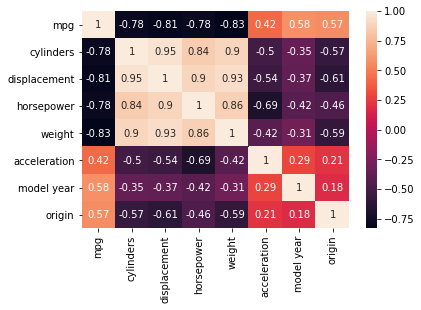

In [14]:
print(df.corr())
sns.heatmap(df.corr(), annot=True)

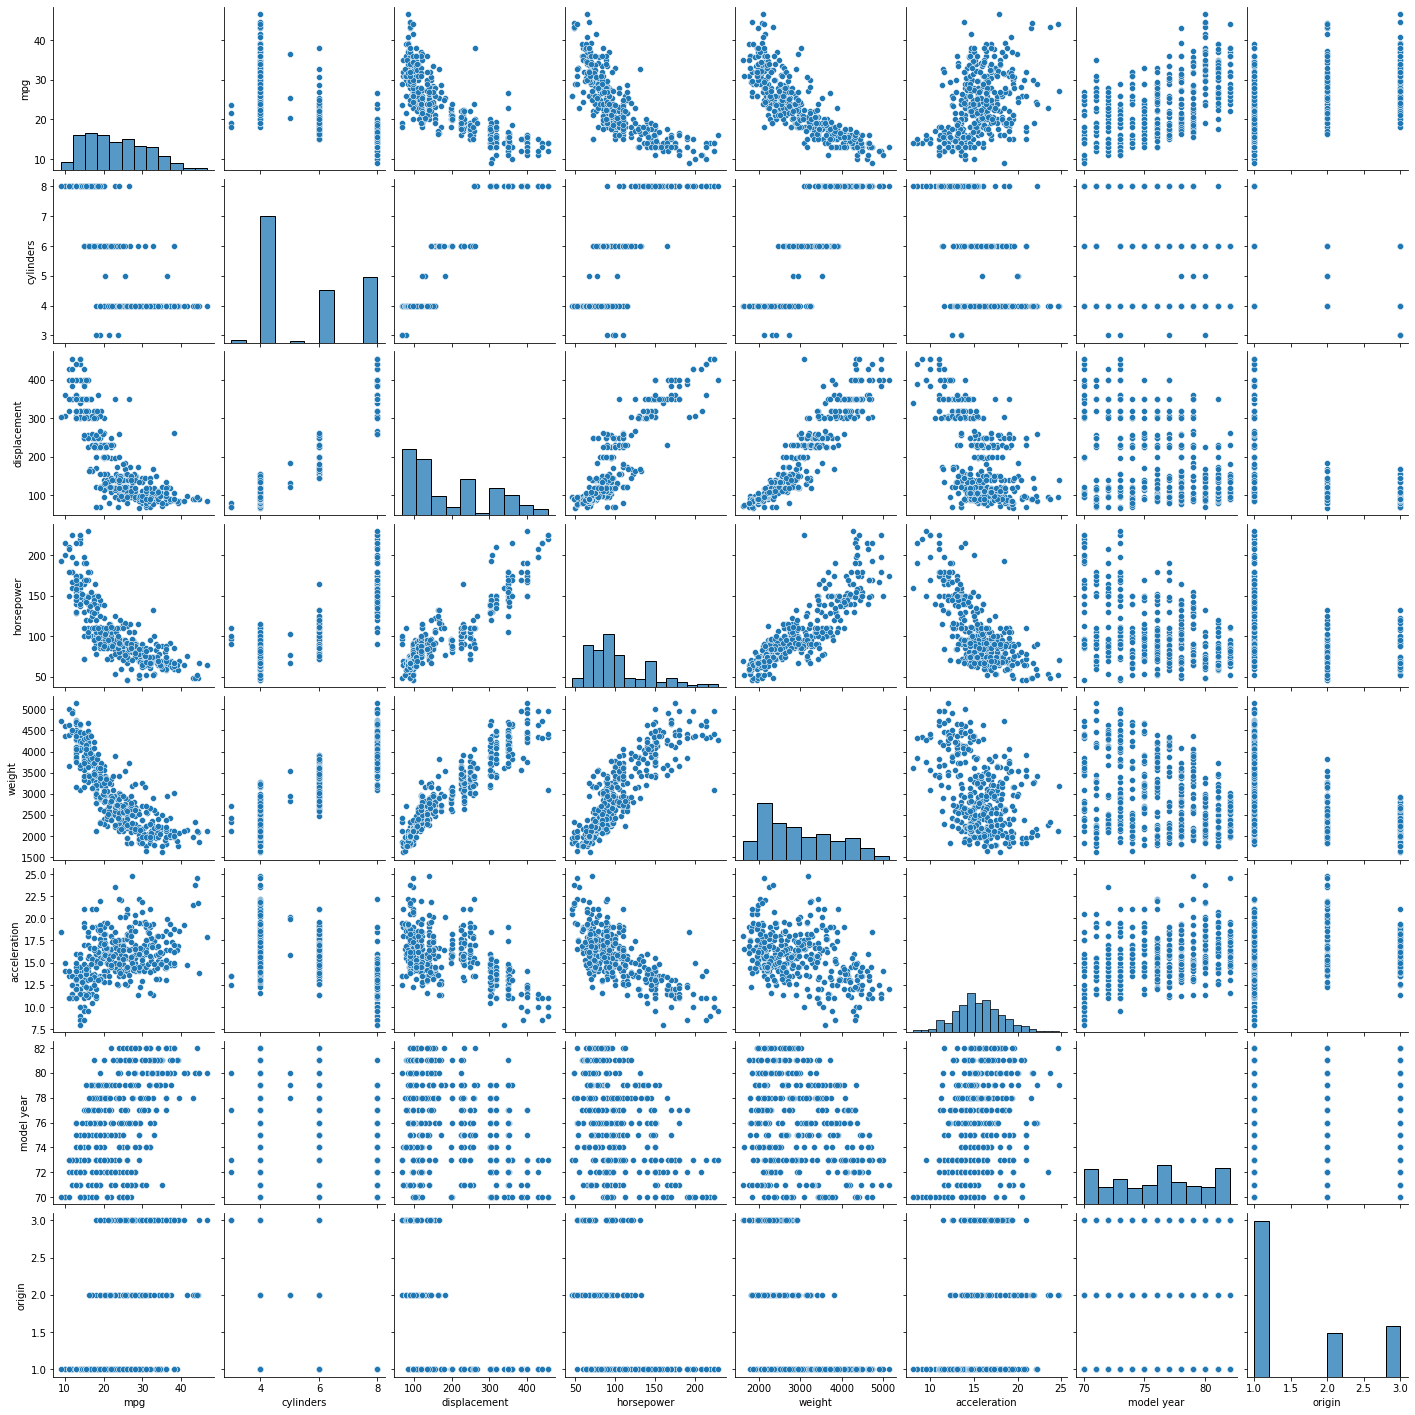

In [25]:
sns.pairplot(df)
plt.show()

In [17]:
# 속성(feature 또는 variable) 선택
# y값(종속변수, 레이블)
# x값(독립변수, 특징값)

ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]
print(ndf.head())

    mpg  cylinders  horsepower  weight
0  18.0          8       130.0  3504.0
1  15.0          8       165.0  3693.0
2  18.0          8       150.0  3436.0
3  16.0          8       150.0  3433.0
4  17.0          8       140.0  3449.0


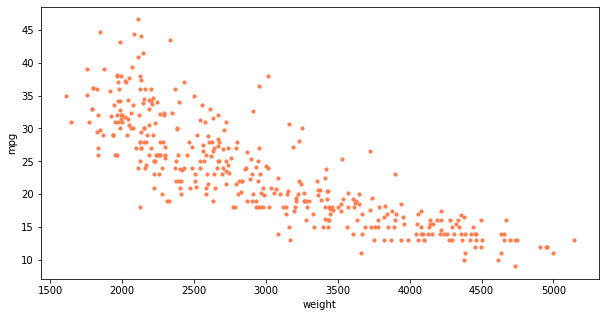

In [20]:
# 종속변수 Y인 "연비(mpg)"와 다른 변수 간의 선형관계를 그래프(산점도)로 확인
# Matplotlib으로 산점도 그리기
ndf.plot(kind='scatter', x='weight', y='mpg', c='coral', s=10, figsize=(10,5))
plt.show()

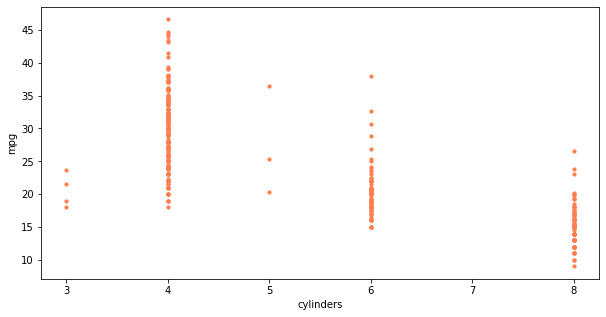

In [21]:
ndf.plot(kind='scatter', x='cylinders', y='mpg', c='coral', s=10, figsize=(10,5))
plt.show()

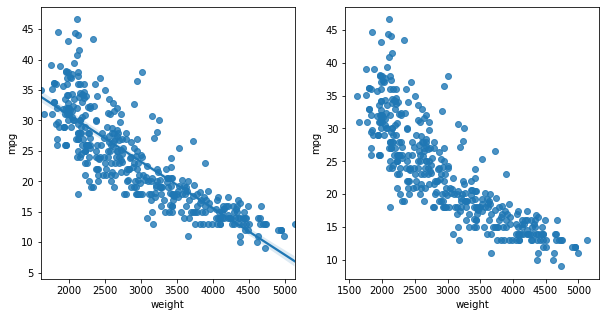

In [42]:
# seaborn으로 산점도 그리기
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax1)      # 회귀선 표시
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax2, fit_reg=False)       # 회귀선 미표시
plt.show()

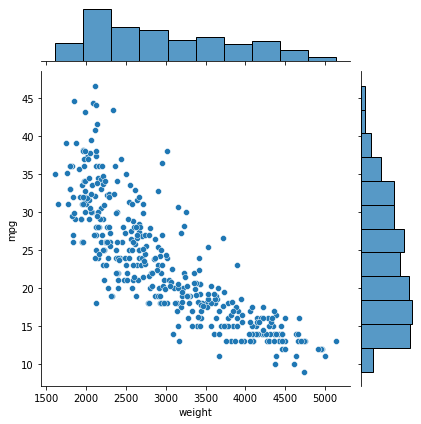

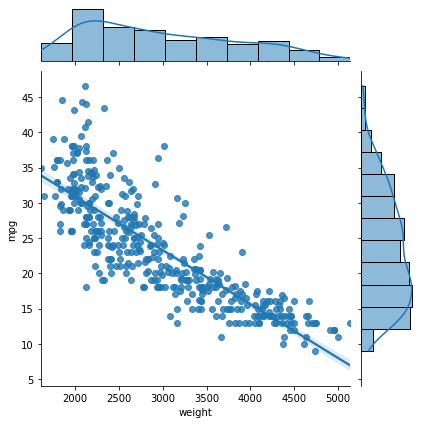

In [23]:
# seaborn의 조인트 그래프 - 산점도, 히스토그램
sns.jointplot(x='weight', y='mpg', data=ndf)        # 회귀선 미표시
sns.jointplot(x='weight', y='mpg', kind='reg', data=ndf)        # 회귀선 표시
plt.show()

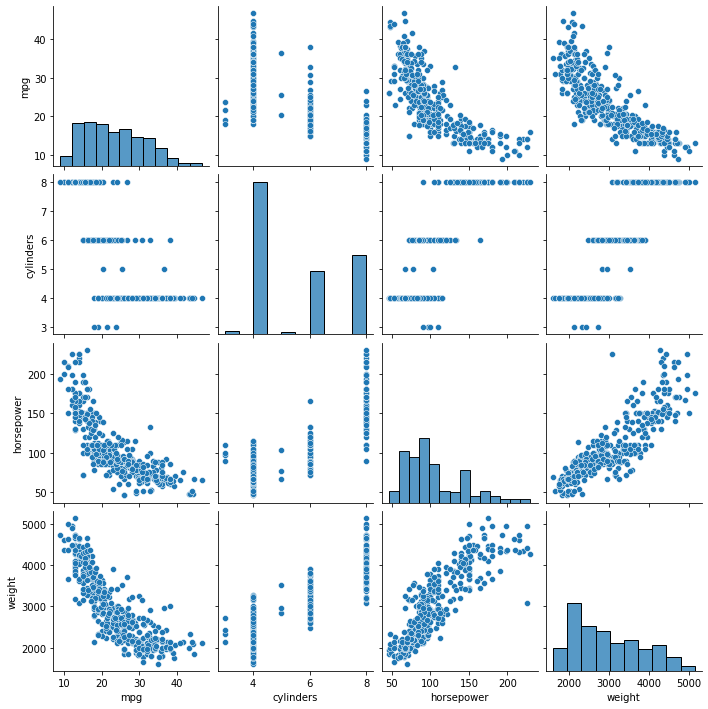

In [27]:
# seaboorn pariplot으로 두 변수 가나읭 모든 경우의 수 그리기
gird_ndf = sns.pairplot(ndf)
plt.show()

In [39]:
# 데이터셋 구분 - 훈련용/검증용
# 훈련데이터: 집에서 공부
# 문제지와 답을 보면서 공부를 함(w, b를 세팅, R2값을 높여야함)
# 검증데이터: 집에서 답지 보지않고 문제 풀곡 답과 맞춤(세팅된 w, b로 확인, R2값이 높은지  확인함)
# 테스트데이터: 학교모의고사
# 문제를 직접풀고 답과 나중에 맞추어봄(세팅된 w, b로 확인, R2값이 높은지 확인함)

X=ndf[['weight']]       # 독립 변수 X
print(len(X))
y=ndf[['mpg']]            # 종속 변수 y

# 훈련용 데이터와 검증용 데이터로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,      # 검증 30%
                                                    random_state=10)        # 랜덤추출 값
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

392
(274, 1) (118, 1)
(274, 1) (118, 1)


In [54]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.6916618001977128, 0.6822458558299322)

In [52]:
r_square = lr.score(X_test, y_test)